In [1]:
from modules.data_types import Transmission
from modules.utils import get_proportions
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster

In [2]:
trn = Transmission.from_hdf5('./data/hier_clustering_all_promoters.ptrn')

In [3]:
trn.plot_state

{'data_column': '_NORMALIZE',
 'labels_column': 'cell_name',
 'datapoint_tracer_curve_column': '_NORMALIZE',
 'cmap': 'jet',
 'ylabels_cmap': 'tab20',
 'type': 'HeatmapTracerWidget'}

In [4]:
props_df = get_proportions(xs=trn.df.cell_name, ys=trn.df.FCLUSTER_LABELS, xs_name='Cell Identity', ys_name='Cluster')

In [5]:
props_df.fillna(value=0, inplace=True)

In [6]:
props_df.drop(['cor_ass_bvin', 'dcen', 'mn', 'pr_amg', 'vac_in', 'ependymal'], axis='index', inplace=True)

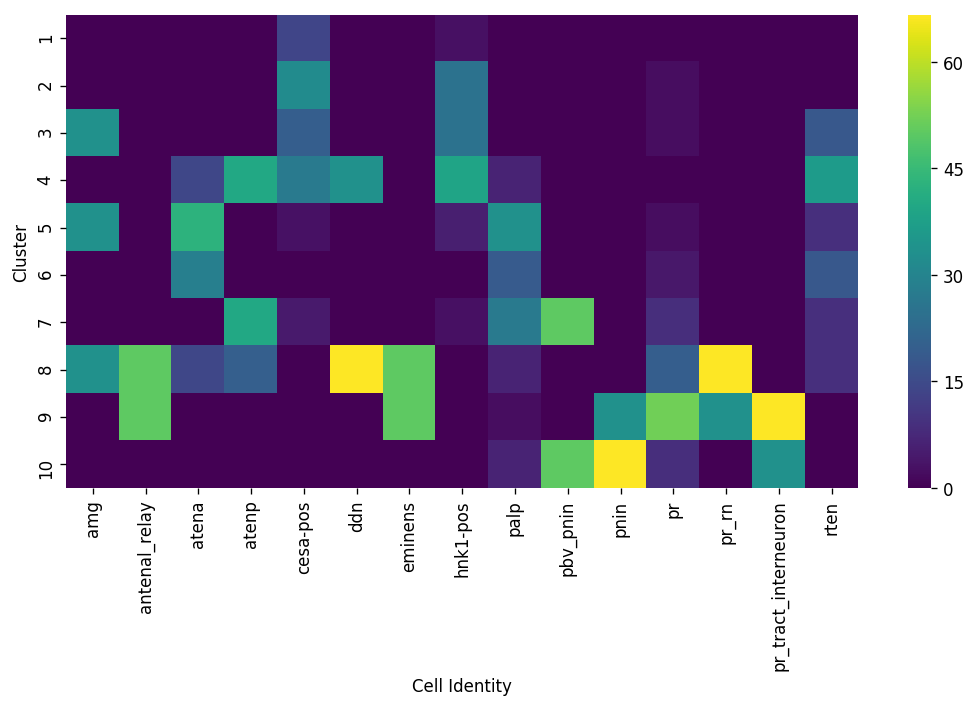

In [7]:
fig = plt.figure(figsize=(9,6), dpi=120)
sns.heatmap(props_df.T, cmap='viridis')
plt.tight_layout()

In [8]:
fig.savefig('./figs/proportions_include_non-neuronal.png', dpi=1200)

In [9]:
Z = linkage(props_df, optimal_ordering=True, method='complete', metric='euclidean')

Text(0.5, 62.499999999999915, 'Cluster')

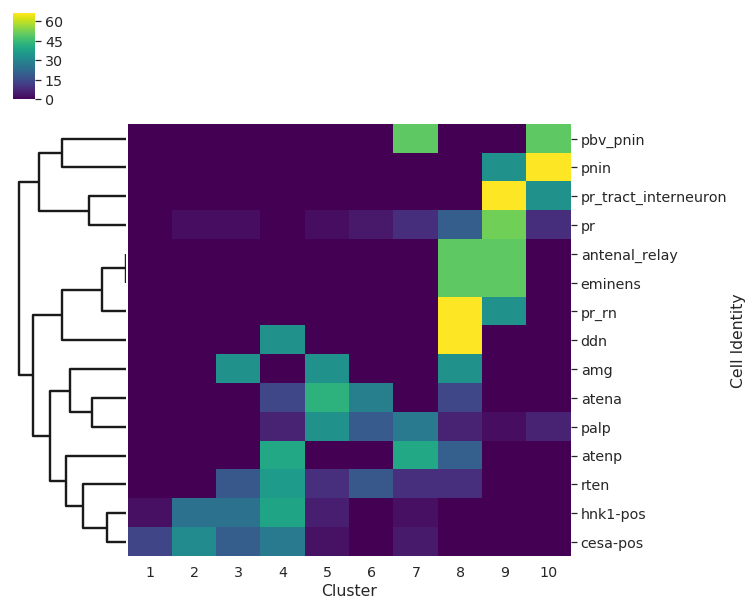

In [10]:
sns.set(font_scale=1.3)
cm = sns.clustermap(data=props_df, row_linkage=Z, col_cluster=False, cmap='viridis')
cm.ax_heatmap.set_ylabel("Cell Identity")
cm.ax_heatmap.set_xlabel("Cluster")

In [11]:
cm.savefig('./figs/proportions_dendrogram_include_non-neuronal.png', dpi=1200)